# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

ii. what preprocessing steps you implemented


In [135]:
!pip install folium
!pip install tqdm
!pip install numpy
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install scipy
!pip install geopy
!pip install tabulate
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     --------------------------------------- 12.8/12.8 MB 11.1 MB/s eta 0:00:00
✔ Download and installation successful
You c

In [136]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger, pos_tag
from nltk.data import find
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\10063\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10063\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\10063\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\10063\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\10063\AppData\Local\Temp\ipykernel_33588\1773985152.py:47: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


# Q1

In [137]:
hotelDf = pd.read_csv('reviews.csv')
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']


In [138]:
hotelDf

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,oshawa\ca\155003\1478553\133252910.html,Residence &amp; Conference Centre - Oshawa,"""This is a university dorm, but with upgrades ...",3,negative,"July 2, 2012",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
1,oshawa\ca\155003\1478553\133870778.html,Residence &amp; Conference Centre - Oshawa,"""Traveled to the area for a Lacrosse tournamen...",4,positive,"July 9, 2012",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
2,oshawa\ca\155003\1478553\162774619.html,Residence &amp; Conference Centre - Oshawa,"""Attending a conference. This university dorm...",4,positive,"June 2, 2013",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
3,oshawa\ca\155003\1478553\162907866.html,Residence &amp; Conference Centre - Oshawa,"""We attended a conference at Durham College an...",5,positive,"June 3, 2013",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
4,oshawa\ca\155003\1478553\205856974.html,Residence &amp; Conference Centre - Oshawa,"""Been meaning to post this for a while. I stay...",3,negative,"May 16, 2014",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
...,...,...,...,...,...,...,...,...,...,...
3158,oshawa\ca\181734\502094\870059339.html,Residence Inn by Marriott Whitby,"""Room has a smell that won\u2019t go away and ...",1,negative,"November 28, 2022",160 Consumers Dr,"('',)",Ontario,L1N 9S3
3159,oshawa\ca\181734\502094\873079022.html,Residence Inn by Marriott Whitby,"""I am apalled at the lack of proper customer s...",1,negative,"December 28, 2022",160 Consumers Dr,"('',)",Ontario,L1N 9S3
3160,oshawa\ca\181734\502094\875942867.html,Residence Inn by Marriott Whitby,"""the bed is so so, the fan in the room made a ...",2,negative,"January 22, 2023",160 Consumers Dr,"('',)",Ontario,L1N 9S3
3161,oshawa\ca\181734\502094\879218614.html,Residence Inn by Marriott Whitby,"""Knowing that there was a hockey tournament, ...",1,negative,3 weeks ago,160 Consumers Dr,"('',)",Ontario,L1N 9S3


In [139]:
print("There are ",len(hotelDf.hotelName.unique()),"hotels in total in the area of Oshawa")


hotelDf['reviewColumn'].isnull().sum()

There are  16 hotels in total in the area of Oshawa


0

In [140]:
hotelDf.hotelName.unique()

array(['Residence &amp; Conference Centre - Oshawa',
       'TownePlace Suites Oshawa', 'Comfort Inn',
       'Durham College Simcoe Village Residence',
       'Travelodge Oshawa Whitby', 'Courtyard by Marriott Oshawa',
       'Paddington Place Bed &amp; Breakfast',
       'La Quinta Inn &amp; Suites Oshawa',
       'Best Western Plus Durham Hotel &amp; Conference Centre',
       'Emerson Manor',
       'Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel',
       'Holiday Inn Express Whitby Oshawa, an IHG Hotel',
       'Quality Suites', 'Lucien Motel', 'Motel 6 Toronto East - Whitby',
       'Residence Inn by Marriott Whitby'], dtype=object)

In [141]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('nice')
    stop.add('one')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    stop.add('place')
    stop.add('staff')
    return stop



def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk



def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf


In [142]:
##extract the reviews##

review_df = hotelDf.reviewColumn.values


review_df = evalSentences(review_df,to_df=True,columns=['reviewCol','vader'])


100%|██████████| 3163/3163 [00:01<00:00, 1666.73it/s]


In [143]:
review_df.head()

,reviewCol,vader
0,"""This is a university dorm, but with upgrades ...",0.8154
1,"""Traveled to the area for a Lacrosse tournamen...",0.9512
2,"""Attending a conference. This university dorm...",0.8518
3,"""We attended a conference at Durham College an...",0.9101
4,"""Been meaning to post this for a while. I stay...",0.7282


In [144]:
topk = getTopKWords(review_df, 500)
finaldf = dataFrameTransformation(hotelDf, review_df, topk)

In [145]:
topk[:10]

[('breakfast', 1918),
 ('clean', 1719),
 ('good', 1330),
 ('would', 1296),
 ('great', 1090),
 ('stayed', 1000),
 ('night', 997),
 ('desk', 889),
 ('friendly', 886),
 ('front', 827)]

In [146]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,breakfast,clean,good,would,great,...,cigarette,maintenance,durham,ended,already,served,head,soft,ground,floors
0,Residence &amp; Conference Centre - Oshawa,3,negative,"""This is a university dorm, but with upgrades ...",0.8154,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Residence &amp; Conference Centre - Oshawa,4,positive,"""Traveled to the area for a Lacrosse tournamen...",0.9512,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Residence &amp; Conference Centre - Oshawa,4,positive,"""Attending a conference. This university dorm...",0.8518,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Residence &amp; Conference Centre - Oshawa,5,positive,"""We attended a conference at Durham College an...",0.9101,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Residence &amp; Conference Centre - Oshawa,3,negative,"""Been meaning to post this for a while. I stay...",0.7282,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
  tempDf.columns = ['hotelName','AverageVaderRating', 'AverageGroundTruthRating','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVaderRating':'mean', 'AverageGroundTruthRating':'mean','n_reviews':'count'})
  return tempDf

In [148]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df.head()

,AverageVaderRating,AverageGroundTruthRating,n_reviews
hotelName,,,
Best Western Plus Durham Hotel &amp; Conference Centre,0.606866,3.713675,468
Comfort Inn,0.567330,3.354610,141
Courtyard by Marriott Oshawa,0.744620,4.050000,20
Durham College Simcoe Village Residence,0.532183,2.833333,18
Emerson Manor,0.912050,4.250000,4


### Top5-AverageGroundTruthRating

In [149]:
avgRatingTop5_gdt = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageGroundTruthRating',ascending=False)[['hotelName','AverageGroundTruthRating']].head(5)
avgRatingTop5_gdt

,hotelName,AverageGroundTruthRating
10,Paddington Place Bed &amp; Breakfast,4.815789
4,Emerson Manor,4.250000
5,Holiday Inn Express &amp; Suites Oshawa Downto...,4.246914
2,Courtyard by Marriott Oshawa,4.050000
8,Lucien Motel,3.952381


### Last5-AverageGroundTruthRating

In [150]:
avgRatingLast5_gdt = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageGroundTruthRating',ascending=False)[['hotelName','AverageGroundTruthRating']].tail(5)
avgRatingLast5_gdt

,hotelName,AverageGroundTruthRating
14,TownePlace Suites Oshawa,3.562500
1,Comfort Inn,3.354610
15,Travelodge Oshawa Whitby,3.310668
3,Durham College Simcoe Village Residence,2.833333
9,Motel 6 Toronto East - Whitby,2.781915


### Top5-AverageVaderRating

In [151]:
avgRatingTop5_VC = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageVaderRating',ascending=False)[['hotelName','AverageVaderRating']].head(5)
avgRatingTop5_VC

,hotelName,AverageVaderRating
4,Emerson Manor,0.912050
10,Paddington Place Bed &amp; Breakfast,0.897747
8,Lucien Motel,0.771771
12,Residence &amp; Conference Centre - Oshawa,0.765588
5,Holiday Inn Express &amp; Suites Oshawa Downto...,0.764408


### Last5-AverageVaderRating

In [152]:
avgRatingLast5_VC = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageVaderRating',ascending=False)[['hotelName','AverageVaderRating']].tail(5)
avgRatingLast5_VC

,hotelName,AverageVaderRating
1,Comfort Inn,0.567330
3,Durham College Simcoe Village Residence,0.532183
14,TownePlace Suites Oshawa,0.502394
15,Travelodge Oshawa Whitby,0.417638
9,Motel 6 Toronto East - Whitby,0.360865


**ASNWER: No, they have a little bit difference with the true ranking on the website. For example: Padding Place ranks behind when comparing to the result I shown above, the reason could be Padding Place only has 42 reviews, it may lack of some persuation. And this condition also happens in hotel Emerson Manor**

# Q2

### (a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection.

In [153]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower() 
                          for word 
                          in re.findall(r'\w+', review) 
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [154]:
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]
itemAnalysisDf.head()

,reviewCol,groundTruth,vader
0,"""This is a university dorm, but with upgrades ...",negative,0.8154
1,"""Traveled to the area for a Lacrosse tournamen...",positive,0.9512
2,"""Attending a conference. This university dorm...",positive,0.8518
3,"""We attended a conference at Durham College an...",positive,0.9101
4,"""Been meaning to post this for a while. I stay...",negative,0.7282


In [155]:
topkGroundPos = getTopK(itemAnalysisDf, 50, label_value='positive')
topkGroundPos

[('breakfast', 1319),
 ('clean', 1254),
 ('great', 942),
 ('good', 930),
 ('friendly', 697),
 ('would', 693),
 ('stayed', 620),
 ('comfortable', 619),
 ('area', 539),
 ('well', 482),
 ('night', 457),
 ('desk', 396),
 ('helpful', 393),
 ('oshawa', 385),
 ('front', 372),
 ('location', 370),
 ('bed', 367),
 ('parking', 341),
 ('pool', 331),
 ('time', 327),
 ('free', 303),
 ('close', 303),
 ('nthe', 300),
 ('check', 297),
 ('hot', 282),
 ('beds', 280),
 ('also', 275),
 ('back', 271),
 ('quiet', 268),
 ('get', 266),
 ('recommend', 259),
 ('could', 257),
 ('service', 257),
 ('definitely', 256),
 ('excellent', 244),
 ('always', 244),
 ('small', 240),
 ('like', 239),
 ('restaurants', 239),
 ('everything', 238),
 ('price', 232),
 ('401', 230),
 ('morning', 228),
 ('two', 218),
 ('even', 213),
 ('really', 210),
 ('best', 205),
 ('next', 201),
 ('coffee', 201),
 ('little', 200)]

In [156]:
topkGroundNeg = getTopK(itemAnalysisDf, 50, label_value='negative')
topkGroundNeg

[('would', 603),
 ('breakfast', 599),
 ('night', 540),
 ('desk', 493),
 ('clean', 465),
 ('front', 455),
 ('good', 400),
 ('stayed', 380),
 ('get', 348),
 ('like', 322),
 ('could', 312),
 ('back', 296),
 ('bed', 288),
 ('door', 280),
 ('told', 276),
 ('time', 261),
 ('area', 245),
 ('floor', 242),
 ('nthe', 242),
 ('check', 235),
 ('even', 234),
 ('pool', 231),
 ('also', 230),
 ('never', 230),
 ('booked', 217),
 ('next', 209),
 ('first', 203),
 ('people', 200),
 ('bathroom', 198),
 ('small', 198),
 ('smoking', 197),
 ('well', 194),
 ('asked', 191),
 ('friendly', 189),
 ('service', 187),
 ('day', 187),
 ('went', 181),
 ('parking', 180),
 ('morning', 176),
 ('price', 172),
 ('two', 168),
 ('work', 168),
 ('manager', 167),
 ('another', 161),
 ('smell', 159),
 ('beds', 156),
 ('got', 156),
 ('location', 155),
 ('sleep', 154),
 ('hot', 154)]

**Answer: The word front, desk, breaskfast etc. appear both in the positive and negative reviews**

### (b) Repeat this analysis for the top-50 noun phrases (using the provided grammar pattern below)

In [157]:
# get all nouns

grammar = r"""
    NBAR:
    {<NN.*|JJ>*<NN.*>} # Nouns and Adjectives, terminated with Nouns
    NP:
    {<NBAR><IN><NBAR>}
    {<NBAR>} # Above, connected with in/of/etc...
"""

chunker = nltk.RegexpParser(grammar)


lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word


def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()


def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted


def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList





def get_terms(tree):
    for leaf in leaves(tree):
      
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [158]:
def NPdataFrameTransformation(hotelDf, reviewDF, chunker = chunker):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    tempCounter = Counter()

    for review in reviews:
        tempCounter.update(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',review))))]))
    topk = tempCounter.most_common(500)


    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)    
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [159]:
finaldf

,hotelName,ratingScore,groundTruth,reviewCol,vader,breakfast,clean,good,would,great,...,cigarette,maintenance,durham,ended,already,served,head,soft,ground,floors
0,Residence &amp; Conference Centre - Oshawa,3,negative,"""This is a university dorm, but with upgrades ...",0.8154,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Residence &amp; Conference Centre - Oshawa,4,positive,"""Traveled to the area for a Lacrosse tournamen...",0.9512,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Residence &amp; Conference Centre - Oshawa,4,positive,"""Attending a conference. This university dorm...",0.8518,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Residence &amp; Conference Centre - Oshawa,5,positive,"""We attended a conference at Durham College an...",0.9101,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Residence &amp; Conference Centre - Oshawa,3,negative,"""Been meaning to post this for a while. I stay...",0.7282,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Residence Inn by Marriott Whitby,1,negative,"""Room has a smell that won\u2019t go away and ...",-0.8545,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,Residence Inn by Marriott Whitby,1,negative,"""I am apalled at the lack of proper customer s...",-0.3182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3160,Residence Inn by Marriott Whitby,2,negative,"""the bed is so so, the fan in the room made a ...",-0.9855,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3161,Residence Inn by Marriott Whitby,1,negative,"""Knowing that there was a hockey tournament, ...",0.5106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
finaldf_noun = NPdataFrameTransformation(hotelDf, review_df)

In [161]:
finaldf_noun

,hotelName,ratingScore,groundTruth,reviewCol,vader,front desk,hot tub,park lot,breakfast area,free breakfast,...,fresh air,wed guest,famili event,larg clean,credit card statement,fit area,wed night,last day,blond ladi,road nois
0,Residence &amp; Conference Centre - Oshawa,3,negative,"""This is a university dorm, but with upgrades ...",0.8154,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Residence &amp; Conference Centre - Oshawa,4,positive,"""Traveled to the area for a Lacrosse tournamen...",0.9512,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Residence &amp; Conference Centre - Oshawa,4,positive,"""Attending a conference. This university dorm...",0.8518,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Residence &amp; Conference Centre - Oshawa,5,positive,"""We attended a conference at Durham College an...",0.9101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Residence &amp; Conference Centre - Oshawa,3,negative,"""Been meaning to post this for a while. I stay...",0.7282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Residence Inn by Marriott Whitby,1,negative,"""Room has a smell that won\u2019t go away and ...",-0.8545,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,Residence Inn by Marriott Whitby,1,negative,"""I am apalled at the lack of proper customer s...",-0.3182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3160,Residence Inn by Marriott Whitby,2,negative,"""the bed is so so, the fan in the room made a ...",-0.9855,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3161,Residence Inn by Marriott Whitby,1,negative,"""Knowing that there was a hockey tournament, ...",0.5106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
def getTopKNP(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol',chunker = chunker):

    # stop words have already been filtered in acceptable_word
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
            counter.update(flatten_phrase_lists([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]))
    topk = counter.most_common(k)
    return topk

In [163]:
itemAnalysisDf_noun = finaldf_noun[['reviewCol','groundTruth','vader']]
itemAnalysisDf_noun.head()

,reviewCol,groundTruth,vader
0,"""This is a university dorm, but with upgrades ...",negative,0.8154
1,"""Traveled to the area for a Lacrosse tournamen...",positive,0.9512
2,"""Attending a conference. This university dorm...",positive,0.8518
3,"""We attended a conference at Durham College an...",positive,0.9101
4,"""Been meaning to post this for a while. I stay...",negative,0.7282


In [164]:
topkGroundPos_noun = getTopKNP(itemAnalysisDf_noun, 50, label_value='positive')
topkGroundPos_noun

[('front desk', 176),
 ('hot tub', 74),
 ('continent breakfast', 41),
 ('free breakfast', 38),
 ('breakfast area', 35),
 ('resid inn', 32),
 ('bedroom suit', 31),
 ('park lot', 31),
 ('complimentari breakfast', 30),
 ('la quinta', 29),
 ('next morn', 27),
 ('hot breakfast', 26),
 ('next time', 26),
 ('comfort bed', 24),
 ('great valu', 24),
 ('good valu', 23),
 ('first time', 22),
 ('great locat', 21),
 ('easi access', 21),
 ('good breakfast', 21),
 ('lot restaur', 19),
 ('holiday inn express', 19),
 ('first floor', 18),
 ('good locat', 17),
 ('qualiti suit', 17),
 ('good size', 16),
 ('full kitchen', 16),
 ('minut walk', 16),
 ('go train', 16),
 ('go station', 16),
 ('custom servic', 16),
 ('busi trip', 16),
 ('hockey tournament', 16),
 ('great experi', 16),
 ('gm centr', 15),
 ('comfort inn', 15),
 ('good night', 15),
 ('breakfast buffet', 15),
 ('holiday inn', 15),
 ('oshawa area', 15),
 ('resid inn whitbi', 15),
 ('separ bedroom', 14),
 ('free park', 14),
 ('next day', 14),
 ('grou

In [165]:
topkGroundNeg_noun = getTopKNP(itemAnalysisDf_noun, 50, label_value='negative')
topkGroundNeg_noun

[('front desk', 231),
 ('non smoke', 43),
 ('park lot', 40),
 ('hot tub', 31),
 ('credit card', 29),
 ('breakfast area', 28),
 ('next morn', 24),
 ('next day', 23),
 ('hockey tournament', 22),
 ('first floor', 22),
 ('holiday inn', 21),
 ('free breakfast', 21),
 ('ground floor', 20),
 ('hockey team', 20),
 ('next door', 19),
 ('first night', 19),
 ('next time', 17),
 ('resid inn', 17),
 ('custom servic', 16),
 ('comfort inn', 15),
 ('bathroom door', 15),
 ('good thing', 15),
 ('second night', 14),
 ('doubl bed', 14),
 ('first time', 14),
 ('continent breakfast', 13),
 ('ice machin', 12),
 ('patio door', 12),
 ('queen bed', 12),
 ('good locat', 12),
 ('holiday inn express', 12),
 ('air condition', 11),
 ('saturday night', 11),
 ('big deal', 11),
 ('coffe maker', 11),
 ('young ladi', 10),
 ('second floor', 10),
 ('sport team', 10),
 ('pool area', 10),
 ('front door', 10),
 ('mani hotel', 10),
 ('best western', 9),
 ('water pressur', 9),
 ('desk clerk', 9),
 ('special rate', 9),
 ('good n

**ANSWER: The word such as front dest again appears both in the positive and negative reviews. In addition, in the postive reviews, the phrase such as 'la quinta','next day' could be filter out, since it doesn't have a explicit meaning, There are also some non-sense word appears in the negative reviews**

## (c) Define a grammar for a phrase pattern (different from the one already provided) that you
think would be helpful for review analysis.

In [166]:
grammar_self = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>} # Nouns and Adjectives, terminated with Nouns
    NP:
        {<NBAR><IN><NBAR>}
        {<NBAR><CC><NBAR>}
        {<NBAR>} # Above, connected with in/of/and/etc...
"""

chunker_self = nltk.RegexpParser(grammar_self)

In [167]:
finaldf_self = NPdataFrameTransformation(hotelDf, review_df,chunker=chunker_self)

In [168]:
finaldf_self

,hotelName,ratingScore,groundTruth,reviewCol,vader,front desk,park lot,breakfast area,hot tub,next morn,...,paper thin,desper need,bar fridg,colleg dorm,dire need,fresh coffe,rest sleep,great continent breakfast,past sever year,charg breakfast
0,Residence &amp; Conference Centre - Oshawa,3,negative,"""This is a university dorm, but with upgrades ...",0.8154,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Residence &amp; Conference Centre - Oshawa,4,positive,"""Traveled to the area for a Lacrosse tournamen...",0.9512,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Residence &amp; Conference Centre - Oshawa,4,positive,"""Attending a conference. This university dorm...",0.8518,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Residence &amp; Conference Centre - Oshawa,5,positive,"""We attended a conference at Durham College an...",0.9101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Residence &amp; Conference Centre - Oshawa,3,negative,"""Been meaning to post this for a while. I stay...",0.7282,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Residence Inn by Marriott Whitby,1,negative,"""Room has a smell that won\u2019t go away and ...",-0.8545,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,Residence Inn by Marriott Whitby,1,negative,"""I am apalled at the lack of proper customer s...",-0.3182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3160,Residence Inn by Marriott Whitby,2,negative,"""the bed is so so, the fan in the room made a ...",-0.9855,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3161,Residence Inn by Marriott Whitby,1,negative,"""Knowing that there was a hockey tournament, ...",0.5106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
itemAnalysisDf_self = finaldf_self[['reviewCol','groundTruth','vader']]
itemAnalysisDf_noun.head()

,reviewCol,groundTruth,vader
0,"""This is a university dorm, but with upgrades ...",negative,0.8154
1,"""Traveled to the area for a Lacrosse tournamen...",positive,0.9512
2,"""Attending a conference. This university dorm...",positive,0.8518
3,"""We attended a conference at Durham College an...",positive,0.9101
4,"""Been meaning to post this for a while. I stay...",negative,0.7282


In [170]:
topkGroundPos_noun = getTopKNP(itemAnalysisDf_self, 50, label_value='positive',chunker=chunker_self)
topkGroundPos_noun

[('front desk', 170),
 ('continent breakfast', 39),
 ('breakfast area', 34),
 ('pool hot tub', 33),
 ('free breakfast', 32),
 ('hot tub', 32),
 ('bedroom suit', 31),
 ('resid inn', 31),
 ('complimentari breakfast', 29),
 ('park lot', 29),
 ('next morn', 27),
 ('la quinta', 27),
 ('hot breakfast', 26),
 ('next time', 25),
 ('first time', 22),
 ('great valu', 21),
 ('good valu', 21),
 ('easi access', 20),
 ('great locat', 19),
 ('first floor', 18),
 ('lot restaur', 18),
 ('good breakfast', 18),
 ('holiday inn express', 18),
 ('good locat', 17),
 ('comfort bed', 16),
 ('minut walk', 16),
 ('busi trip', 16),
 ('hockey tournament', 16),
 ('oshawa area', 16),
 ('great experi', 16),
 ('qualiti suit', 16),
 ('gm centr', 15),
 ('comfort inn', 15),
 ('good night', 15),
 ('go train', 15),
 ('go station', 15),
 ('breakfast buffet', 15),
 ('custom servic', 15),
 ('clean breakfast', 15),
 ('resid inn whitbi', 15),
 ('next day', 14),
 ('good size', 14),
 ('full kitchen', 14),
 ('second floor', 14),
 

In [171]:
topkGroundNeg_noun = getTopKNP(itemAnalysisDf_self, 50, label_value='negative',chunker = chunker_self)
topkGroundNeg_noun

[('front desk', 228),
 ('non smoke', 42),
 ('park lot', 39),
 ('credit card', 28),
 ('breakfast area', 26),
 ('next morn', 24),
 ('next day', 23),
 ('first floor', 21),
 ('hot tub', 21),
 ('hockey tournament', 20),
 ('ground floor', 20),
 ('free breakfast', 19),
 ('next door', 18),
 ('holiday inn', 18),
 ('first night', 18),
 ('hockey team', 18),
 ('next time', 17),
 ('resid inn', 17),
 ('good thing', 15),
 ('bathroom door', 14),
 ('custom servic', 14),
 ('second night', 14),
 ('first time', 14),
 ('comfort inn', 13),
 ('doubl bed', 13),
 ('patio door', 12),
 ('queen bed', 12),
 ('air condition', 11),
 ('saturday night', 11),
 ('good locat', 11),
 ('big deal', 11),
 ('holiday inn express', 11),
 ('continent breakfast', 10),
 ('young ladi', 10),
 ('second floor', 10),
 ('sport team', 10),
 ('front door', 10),
 ('mani hotel', 10),
 ('ice machin', 9),
 ('best western', 9),
 ('desk clerk', 9),
 ('special rate', 9),
 ('good night', 9),
 ('gener manag', 9),
 ('pool hot tub', 9),
 ('la quinta

# Q3

In [172]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [173]:
finaldf

,hotelName,ratingScore,groundTruth,reviewCol,vader,breakfast,clean,good,would,great,...,cigarette,maintenance,durham,ended,already,served,head,soft,ground,floors
0,Residence &amp; Conference Centre - Oshawa,3,negative,"""This is a university dorm, but with upgrades ...",0.8154,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Residence &amp; Conference Centre - Oshawa,4,positive,"""Traveled to the area for a Lacrosse tournamen...",0.9512,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Residence &amp; Conference Centre - Oshawa,4,positive,"""Attending a conference. This university dorm...",0.8518,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Residence &amp; Conference Centre - Oshawa,5,positive,"""We attended a conference at Durham College an...",0.9101,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Residence &amp; Conference Centre - Oshawa,3,negative,"""Been meaning to post this for a while. I stay...",0.7282,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Residence Inn by Marriott Whitby,1,negative,"""Room has a smell that won\u2019t go away and ...",-0.8545,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,Residence Inn by Marriott Whitby,1,negative,"""I am apalled at the lack of proper customer s...",-0.3182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3160,Residence Inn by Marriott Whitby,2,negative,"""the bed is so so, the fan in the room made a ...",-0.9855,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3161,Residence Inn by Marriott Whitby,1,negative,"""Knowing that there was a hockey tournament, ...",0.5106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
finaldf[topk[0][0]]

0       1
1       0
2       0
3       0
4       1
       ..
3158    1
3159    0
3160    1
3161    0
3162    0
Name: breakfast, Length: 3163, dtype: int64

In [175]:
finaldf["groundTruth"]

0       negative
1       positive
2       positive
3       positive
4       negative
          ...   
3158    negative
3159    negative
3160    negative
3161    negative
3162    positive
Name: groundTruth, Length: 3163, dtype: object

In [176]:
miScoredf = getMI(topk, finaldf)

miScoredf.head(50)

,Word,MI Score
4,great,0.043918
158,dirty,0.027443
48,told,0.026485
1,clean,0.022896
54,never,0.021774
8,friendly,0.021767
123,smell,0.021291
149,smoke,0.020586
38,door,0.020085
11,comfortable,0.019737


**ANSWER: Yes, the result seems alot more reasonable, from the result shown above, the top scored words such as Great, Dirty, Clean, Never, Friendly has a strong meaning towards the positive or negative meaning.**

In [177]:
def getTopKNP(df, kNPs, chunker = chunker):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

In [178]:
topk_non_noun_phrase = getTopKNP(finaldf_noun, 50,chunker = chunker_self) 


In [179]:
miScoredf_noun = getMI(topk_non_noun_phrase, finaldf_self)

miScoredf_noun.head(50)

,Word,MI Score
7,non smoke,6.259367e-03
0,front desk,5.355508e-03
19,credit card,4.462875e-03
42,great valu,3.096323e-03
47,good thing,1.886858e-03
1,park lot,1.667482e-03
36,easi access,1.451883e-03
29,hockey team,1.364878e-03
27,next door,1.353078e-03
13,bedroom suit,1.347123e-03


**ANSWER: non smoke, credir card, front desk has a higher MI score, and based on the result, I would recommand all the hotel in Oshawa area become a non-smoke hotel, and may focus more on the service quality of the front dest, and maybe imporve the payment system to support credit card payment.**

# Q4

### (a) For ground truth sentiment, calculate the top-50 words according to Pointwise Mutual Information (PMI) of the word occurring with (i) positive reviews and (ii) negative reviews.

In [180]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [181]:
pmiposdf = pmiForAllCal(finaldf,topk,'positive')

pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 867.00it/s]


,pmi
amazing,0.41944
enjoyed,0.375264
perfect,0.369082
fast,0.357624
excellent,0.351719
highly,0.349616
loved,0.346609
fantastic,0.333364
easy,0.327469
thank,0.319561


In [182]:
pminegdf = pmiForAllCal(finaldf,topk,'negative')

pminegdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 980.46it/s] 


,pmi
worst,0.959947
cigarette,0.917493
dirty,0.888204
rude,0.879027
smelled,0.852102
smoke,0.823199
terrible,0.819295
charged,0.807931
broken,0.802201
hair,0.796097


**ANSWER: From the result, we can see that the negative reviews has much more higher PMI value.**

In [183]:
topk_noun = getTopKNP(finaldf_noun, 50)

In [184]:
pmiposdf_NP = pmiForAllCal(finaldf_noun,topk_noun,'positive')

pmiposdf_NP.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 838.65it/s]


,pmi
great valu,0.464392
easi access,0.33086
bedroom suit,0.305327
good breakfast,0.290038
hot breakfast,0.288501
complimentari breakfast,0.28207
great locat,0.250818
continent breakfast,0.207672
good valu,0.198689
go station,0.192458


In [185]:
pminegdf_NP = pmiForAllCal(finaldf_noun,topk_noun,'negative')

pminegdf_NP.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 1106.48it/s]


,pmi
credit card,0.82991
non smoke,0.807931
good thing,0.653781
hockey team,0.60459
next door,0.584788
first night,0.567396
next day,0.489478
ground floor,0.45617
hockey tournament,0.443709
ice machin,0.430637


**ANSWER: THE SAME PATTERN COULD ALSO BE OBSERVED HERE, THE NEGATIVE REEVIEWS TEND TO HAVE A HIGHER PMI SCORES>**

In [ ]:
hotelDf_top = hotelDf[hotelDf['hotelName']=='La Quinta Inn &amp; Suites Oshawa']
hotelDf_bot = hotelDf[hotelDf['hotelName']=='Travelodge Oshawa Whitby']

In [ ]:
hotelDf_top

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
1119,oshawa\ca\155003\4560719\184737978.html,La Quinta Inn &amp; Suites Oshawa,"""Awesome place to stay! Very clean, brand new ...",5,positive,"November 14, 2013",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
1120,oshawa\ca\155003\4560719\184877137.html,La Quinta Inn &amp; Suites Oshawa,"""Hotel has a boutique feel and is nicely decor...",4,positive,"November 16, 2013",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
1121,oshawa\ca\155003\4560719\186312600.html,La Quinta Inn &amp; Suites Oshawa,"""When I pulled up to this property I thought I...",4,positive,"November 30, 2013",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
1122,oshawa\ca\155003\4560719\186780363.html,La Quinta Inn &amp; Suites Oshawa,"""I travel for work every 2 weeks and stay in h...",5,positive,"December 4, 2013",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
1123,oshawa\ca\155003\4560719\187363461.html,La Quinta Inn &amp; Suites Oshawa,"""I had booked spur of the moment and was very ...",4,positive,"December 11, 2013",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
...,...,...,...,...,...,...,...,...,...,...
1572,oshawa\ca\155003\4560719\852397728.html,La Quinta Inn &amp; Suites Oshawa,"""The hotel staff was very friendly the service...",5,positive,"August 6, 2022",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
1573,oshawa\ca\155003\4560719\856430771.html,La Quinta Inn &amp; Suites Oshawa,"""This place is full of hookers crack heads and...",1,negative,"August 25, 2022",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
1574,oshawa\ca\155003\4560719\859810184.html,La Quinta Inn &amp; Suites Oshawa,"""The room was fine and clean, although older d...",3,negative,"September 12, 2022",63 King St E,"('Oshawa',)",Ontario,L1H 1B4
1575,oshawa\ca\155003\4560719\863340409.html,La Quinta Inn &amp; Suites Oshawa,"""We booked one night stay on a Saturday night....",1,negative,"October 5, 2022",63 King St E,"('Oshawa',)",Ontario,L1H 1B4


In [ ]:
hotelDf_bot

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
208,oshawa\ca\155003\188437\100601154.html,Travelodge Oshawa Whitby,"""Very good rate and a great place to stay. Ni...",5,positive,"March 18, 2011",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
209,oshawa\ca\155003\188437\101398700.html,Travelodge Oshawa Whitby,"""the staff and management go above and beyond ...",5,positive,"March 24, 2011",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
210,oshawa\ca\155003\188437\101893547.html,Travelodge Oshawa Whitby,"""I was staying at this hotel with a hockey tea...",1,negative,"March 28, 2011",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
211,oshawa\ca\155003\188437\102055657.html,Travelodge Oshawa Whitby,"""I have stayed here on several occasions, some...",4,positive,"March 29, 2011",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
212,oshawa\ca\155003\188437\104349908.html,Travelodge Oshawa Whitby,"""I travel all over southern Ontario with a cor...",5,positive,"April 17, 2011",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
...,...,...,...,...,...,...,...,...,...,...
1056,oshawa\ca\155003\188437\871178290.html,Travelodge Oshawa Whitby,"""I never write reviews, but need to vent. I st...",1,negative,"December 9, 2022",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
1057,oshawa\ca\155003\188437\87223398.html,Travelodge Oshawa Whitby,"""Nice commfee new beds ,lots of pillows,great ...",5,positive,"November 15, 2010",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
1058,oshawa\ca\155003\188437\874661745.html,Travelodge Oshawa Whitby,"""How is it that 20 years after smoking was ban...",2,negative,"January 10, 2023",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6
1059,oshawa\ca\155003\188437\877005027.html,Travelodge Oshawa Whitby,"""The pool and hot tub are advertised as open a...",2,negative,"January 31, 2023",940 Champlain Ave,"('Oshawa',)",Ontario,L1J 7A6


In [ ]:
reviewDF_top = review_df.iloc[hotelDf_top.index]
reviewDF_bot = review_df.iloc[hotelDf_bot.index]


hotelDf_top.reset_index(inplace=True)
hotelDf_bot.reset_index(inplace=True)
reviewDF_top.reset_index(inplace=True)
reviewDF_bot.reset_index(inplace=True)

In [ ]:
topk_top = getTopKWords(reviewDF_top, 500)
finaldf_top = dataFrameTransformation(hotelDf_top, reviewDF_top, topk_top)

In [ ]:
pmiposdf_top = pmiForAllCal(finaldf_top,topk_top,'positive')

pmiposdf_top.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 2415.41it/s]


,pmi
highly,0.390297
toronto,0.390297
amazing,0.390297
welcome,0.390297
enjoyed,0.343777
fresh,0.329672
super,0.329672
value,0.327777
laquinta,0.316189
excellent,0.313336


In [ ]:
pmiposdf_top_neg = pmiForAllCal(finaldf_top,topk_top,'negative')

pmiposdf_top_neg.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 2593.90it/s]


,pmi
rude,1.129657
worst,1.129657
smell,1.055549
terrible,1.034347
sheets,1.024296
music,1.018431
unit,1.011874
playing,1.011874
basic,0.996126
smoking,0.996126


In [ ]:
topk_bot = getTopKWords(reviewDF_bot, 500)
finaldf_bot = dataFrameTransformation(hotelDf_bot, reviewDF_bot, topk_bot)

In [ ]:
pmiposdf_bot = pmiForAllCal(finaldf_bot,topk_bot,'positive')

pmiposdf_bot.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 2051.59it/s]


,pmi
perfect,0.576668
love,0.568299
enjoyed,0.534638
toronto,0.531932
restaurants,0.51469
excellent,0.503761
easy,0.48701
convenient,0.47695
loved,0.465442
plenty,0.454971


In [ ]:
pmiposdf_bot_neg = pmiForAllCal(finaldf_bot,topk_bot,'negative')

pmiposdf_bot_neg.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 2045.34it/s]


,pmi
worn,0.752307
cards,0.752307
stained,0.752307
heat,0.752307
confirmation,0.752307
system,0.752307
cigarettes,0.752307
mold,0.752307
stains,0.701014
disgusting,0.701014


In [ ]:
finaldf_top_NP = NPdataFrameTransformation(hotelDf_top, reviewDF_top)
topK_top_NP = getTopKNP(finaldf_top_NP, 50) 

In [ ]:
topK_top_NP

[('front desk', 47),
 ('la quinta', 38),
 ('park lot', 28),
 ('downtown oshawa', 20),
 ('first floor', 15),
 ('gm centr', 13),
 ('bar next door', 10),
 ('lot restaur', 9),
 ('park garag', 9),
 ('young ladi', 9),
 ('continent breakfast', 8),
 ('free breakfast', 8),
 ('good night', 8),
 ('great valu', 8),
 ('complimentari breakfast', 8),
 ('first time', 7),
 ('la quinta oshawa', 7),
 ('next time', 7),
 ('custom servic', 6),
 ('next door', 6),
 ('minut walk', 6),
 ('oshawa area', 6),
 ('good breakfast', 6),
 ('la quinta inn', 6),
 ('good valu', 5),
 ('free wifi', 5),
 ('busi trip', 5),
 ('mini fridg', 5),
 ('breakfast area', 5),
 ('free park', 5),
 ('second floor', 5),
 ('downtown area', 5),
 ('comfort bed', 5),
 ('third floor', 5),
 ('next morn', 5),
 ('great locat', 5),
 ('brick wall', 5),
 ('first night', 5),
 ('queen bed', 5),
 ('hockey tournament', 5),
 ('loud music', 4),
 ('front door', 4),
 ('gm center', 4),
 ('hot water', 4),
 ('nois level', 4),
 ('small side', 4),
 ('doubl bed', 

In [ ]:
pminegdf_top = pmiForAllCal(finaldf_top_NP,topK_top_NP,'positive')

pminegdf_top.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 2245.39it/s]


,pmi
pleasant surpris,0.390297
oshawa busi,0.390297
great price,0.390297
small side,0.390297
great locat,0.390297
downtown area,0.390297
second floor,0.390297
free park,0.390297
great valu,0.390297
complimentari breakfast,0.256765


In [ ]:
pminegdf_top = pmiForAllCal(finaldf_top_NP,topK_top_NP,'negative')

pminegdf_top.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 2289.82it/s]


,pmi
front door,1.129657
loud music,1.129657
bar next door,0.906513
next door,0.906513
comfort bed,0.906513
nois level,0.841975
brick wall,0.724192
first floor,0.644149
breakfast area,0.618831
next morn,0.618831


In [ ]:
finaldf_bot_NP = NPdataFrameTransformation(hotelDf_bot, reviewDF_bot)
topK_bot_NP = getTopKNP(finaldf_bot_NP, 50) 

In [ ]:
pminegdf_bot = pmiForAllCal(finaldf_bot_NP,topK_bot_NP,'positive')

pminegdf_bot.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 1772.62it/s]


,pmi
easi access,0.637292
hot breakfast,0.637292
good breakfast,0.519509
continent breakfast,0.494191
breakfast buffet,0.454971
good night,0.454971
littl bit,0.414149
complimentari breakfast,0.34961
travelodg oshawa whitbi,0.30082
hot tub,0.2543


In [ ]:
pminegdf_bot = pmiForAllCal(finaldf_bot_NP,topK_bot_NP,'negative')

pminegdf_bot.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 1920.84it/s]


,pmi
key card,0.752307
good thing,0.752307
credit card,0.752307
secur guard,0.752307
much nois,0.752307
mainten man,0.752307
pet friendli,0.752307
hockey team,0.634524
hockey tournament,0.618776
desk chair,0.598157


**ANSWER: when PMI value is a large positive value, when the word or phrase appears, it tend to increase the probability of positive reviews, viceversa. From the result shown above, in the top hotles, loud music	-10.206338 in positive reviews, but scores 1.129657 in the negative reviews means hotel which provide the customer with a quiet living place tend to have more positive reviews. Following this trend, the hotel with a free parking will also tend to have more positive reviews. For the bottom hotel, it seems like cigarett smoke is their main issue that causing negative reviews, they should work on this problem to gain more good reviews.**

# Q5

**Note** Remember to save a static image of the map in the notebook

## A. Histogram

### (i)

In [ ]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

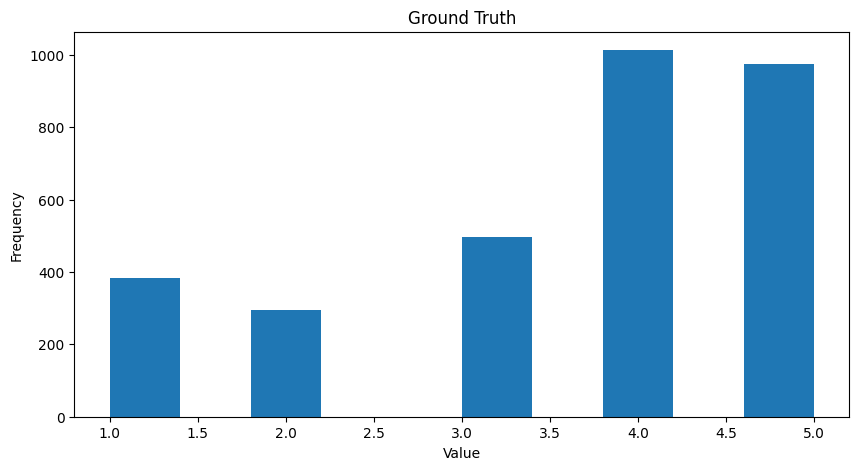

In [ ]:
getHistogram(finaldf,'ratingScore', 'Ground Truth')

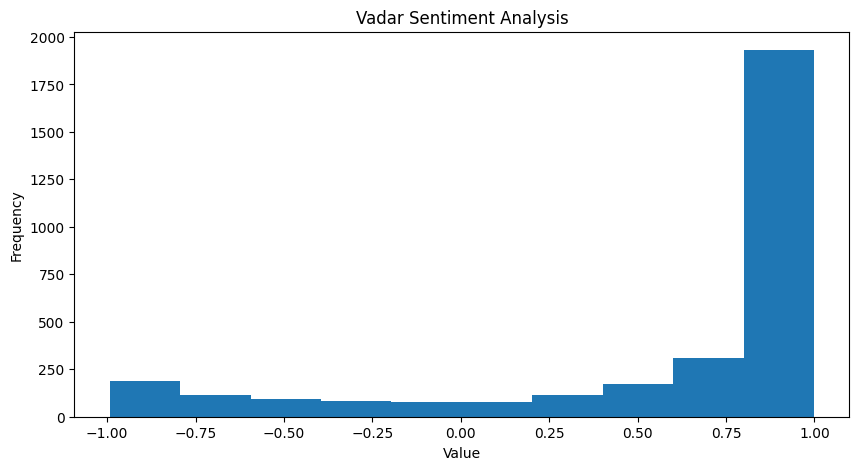

In [ ]:
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

**ANSWER: The hotel with higher rating score tend to have a higher Vader score**

### (ii) Show a histogram of the number of reviews per hotel.

In [ ]:
count_df = finaldf['reviewCol'].groupby(finaldf.hotelName).count()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


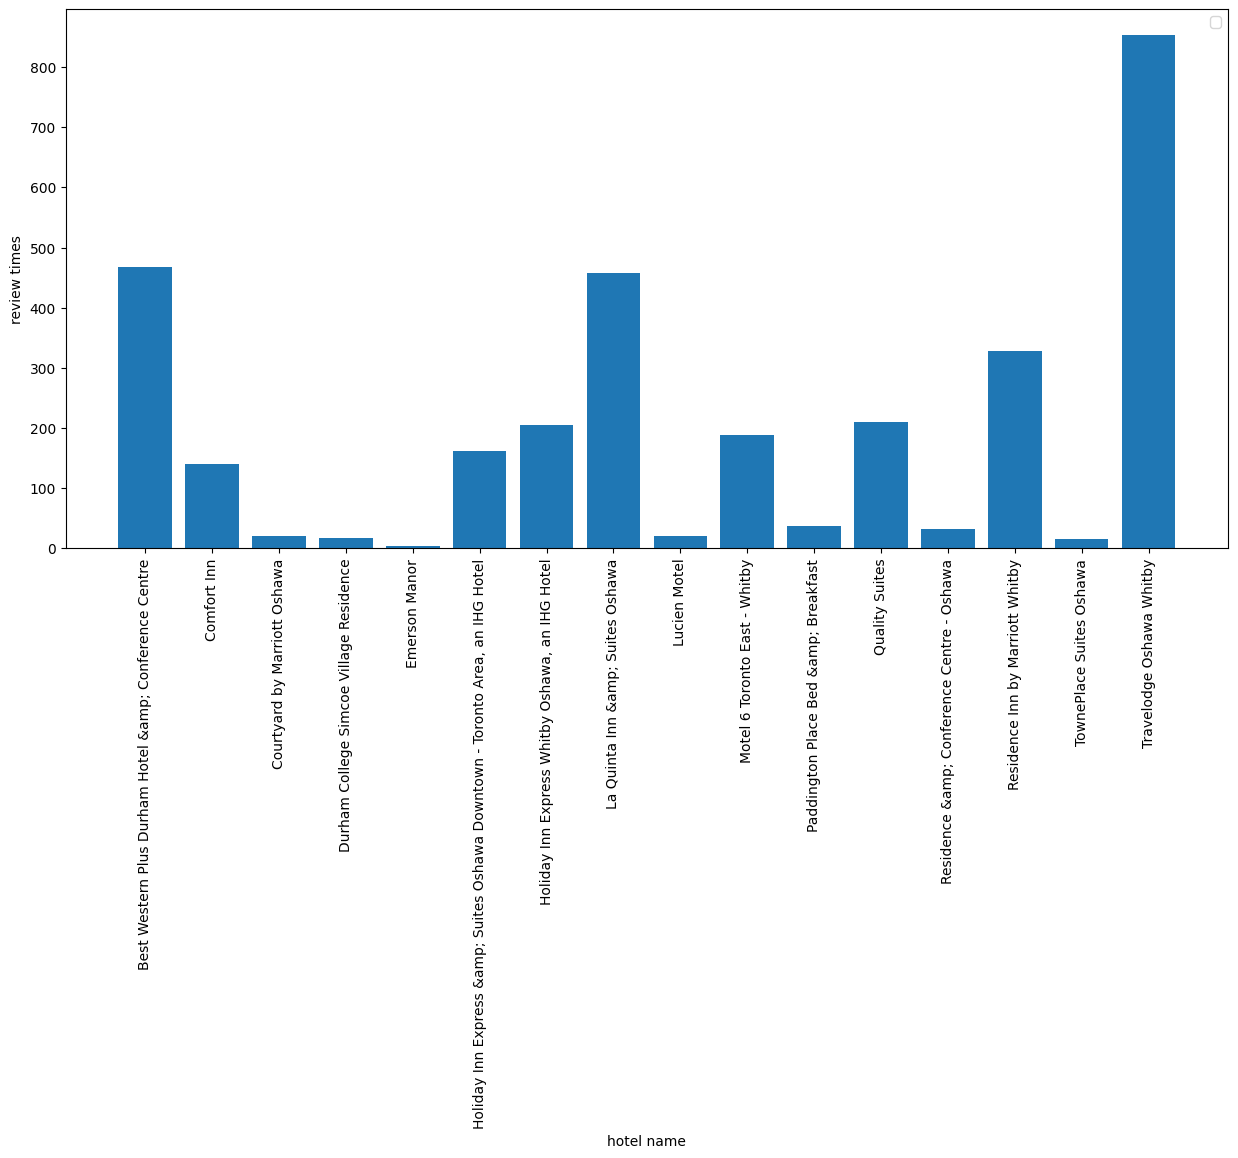

In [ ]:
plt.figure(figsize = (15,7))
plt.bar(count_df.index,count_df.values)
plt.xticks(rotation=90)
plt.xlabel('hotel name') 
plt.ylabel('review times')
plt.legend()

**ANSWER: from the histogram, we can see that this is a imbalanced dataset, and the hotel with less reviews tend to have a higher score.**

## (b) Boxplots

### (ii) In two plots, one for ground truth star rating and one for Vader sentiment

In [ ]:
top_five_hotel = avg_rating_df.sort_values('AverageGroundTruthRating',ascending= False)[:5] # top5 by star rating
top_five_hotel = top_five_hotel.index.to_list()


hotel_score_df = finaldf.loc[finaldf['hotelName'].isin(top_five_hotel)]



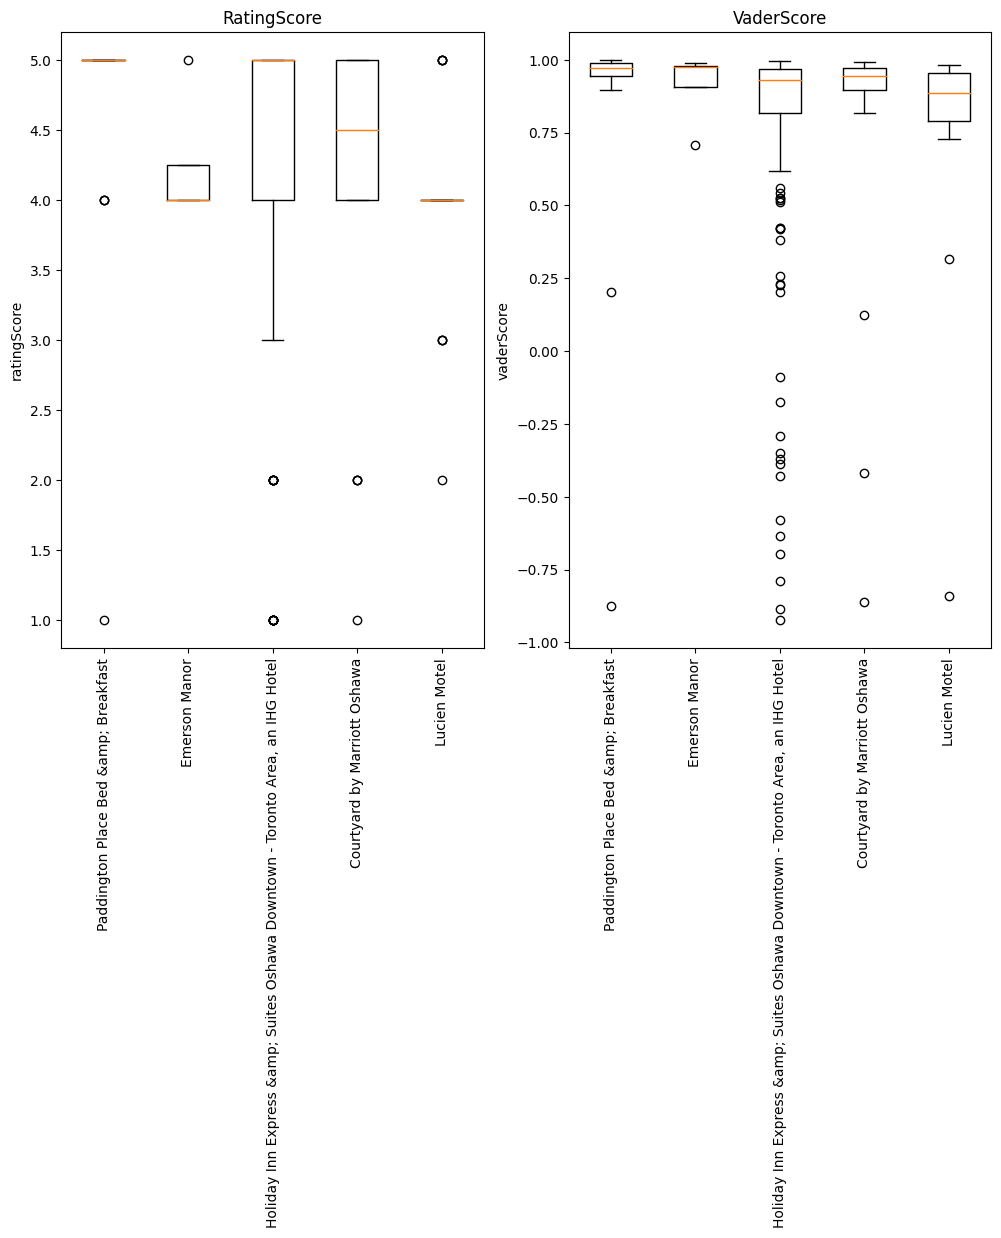

In [ ]:
hotel_score = []
hotel_vader = []
for hotel in top_five_hotel:
  score = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_score.append(score)
  vader = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_vader.append(vader)


plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("RatingScore")
plt.boxplot(hotel_score)
plt.xticks(np.arange(1,6), top_five_hotel,rotation=90)
plt.ylabel('ratingScore')


plt.subplot(1,2,2)
plt.title("VaderScore")
plt.boxplot(hotel_vader)
plt.xticks(np.arange(1,6), top_five_hotel,rotation=90)
plt.ylabel('vaderScore')
plt.show()


### (ii) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.


In [ ]:
#RatingScore:


for name in top_five_hotel:
    mean_score = finaldf[finaldf['hotelName'] == name]['ratingScore'].mean()
    variance_score = finaldf[finaldf['hotelName'] == name]['ratingScore'].var()

        
    print('The mean of rating score for the hotel {} is {}'.format(name,mean_score))
    print('The variance of rating score for the hotel {} is {}'.format(name,variance_score))
    print('')

overall_mean_score = hotel_score_df['ratingScore'].mean()
overall_variance_score= hotel_score_df['ratingScore'].var()
print('The overall mean of rating score is {}'.format(overall_mean_score))
print('The overall variance of rating score is {}'.format(overall_variance_score))




The mean of rating score for the hotel Paddington Place Bed &amp; Breakfast is 4.815789473684211
The variance of rating score for the hotel Paddington Place Bed &amp; Breakfast is 0.47866287339971547

The mean of rating score for the hotel Emerson Manor is 4.25
The variance of rating score for the hotel Emerson Manor is 0.25

The mean of rating score for the hotel Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel is 4.246913580246914
The variance of rating score for the hotel Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel is 1.2305804769572897

The mean of rating score for the hotel Courtyard by Marriott Oshawa is 4.05
The variance of rating score for the hotel Courtyard by Marriott Oshawa is 1.6289473684210527

The mean of rating score for the hotel Lucien Motel is 3.9523809523809526
The variance of rating score for the hotel Lucien Motel is 0.5476190476190474

The overall mean of rating score is 4.293877551020408
The overall 

In [ ]:
##VADER SCORE
for name in top_five_hotel:
    mean_score = finaldf[finaldf['hotelName'] == name]['vader'].mean()
    variance_score = finaldf[finaldf['hotelName'] == name]['vader'].var()

        
    print('The mean of vader for the hotel {} is {}'.format(name,mean_score))
    print('The variance of vader for the hotel {} is {}'.format(name,variance_score))
    print('')

overall_mean_score = hotel_score_df['vader'].mean()
overall_variance_score= hotel_score_df['vader'].var()
print('The overall mean of vader is {}'.format(overall_mean_score))
print('The overall variance of vader is {}'.format(overall_variance_score))

The mean of vader for the hotel Paddington Place Bed &amp; Breakfast is 0.8977473684210523
The variance of vader for the hotel Paddington Place Bed &amp; Breakfast is 0.10337041931721196

The mean of vader for the hotel Emerson Manor is 0.91205
The variance of vader for the hotel Emerson Manor is 0.018422910000000004

The mean of vader for the hotel Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel is 0.7644080246913577
The variance of vader for the hotel Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel is 0.17467561912775098

The mean of vader for the hotel Courtyard by Marriott Oshawa is 0.7446200000000001
The variance of vader for the hotel Courtyard by Marriott Oshawa is 0.2642543616842105

The mean of vader for the hotel Lucien Motel is 0.7717714285714286
The variance of vader for the hotel Lucien Motel is 0.15863939714285713

The overall mean of vader is 0.7865155102040821
The overall variance of vader is 0.1674115050043492

### (iii) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?

**ASWER: They are equally informative. Becasue boxplot contains summary statistics: the minimum value, the first quartile (Q1), the median (Q2), the third quartile (Q3), and the maximum value. However, In my opinion, mean and variance is more informative, because express them as a number gives us a more direct feeling about how well the hotel is.**

## (c) Scatterplots and heatmaps

### (i) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score.

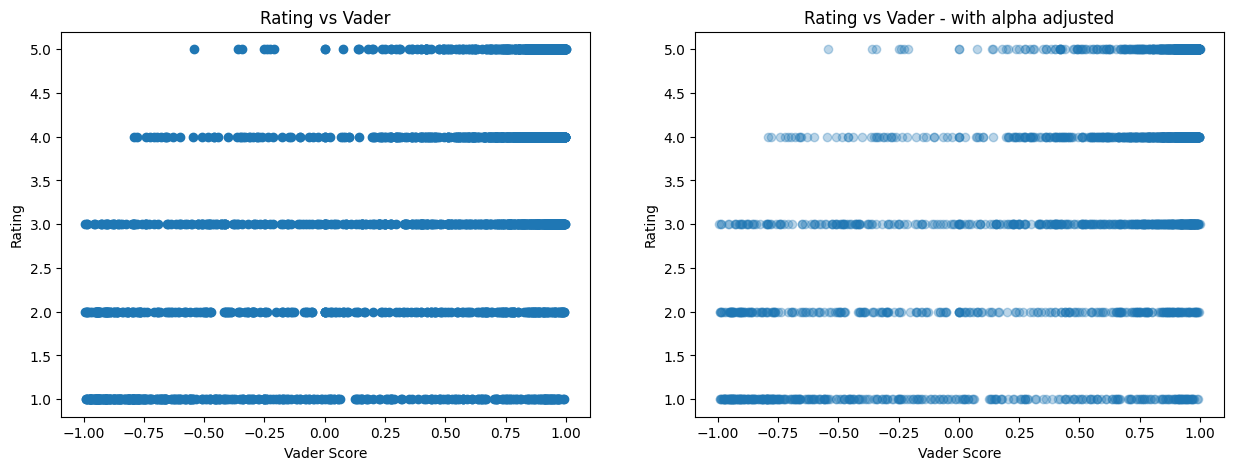

In [ ]:
##Scatter Plot

fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Vader Score')

**ANSWER:For the scatter plot, we can see that the higher rating(>=3) usually has more data point on the vader score range**

Text(0.5, 1.0, 'Rating vs Vader - kernel density')

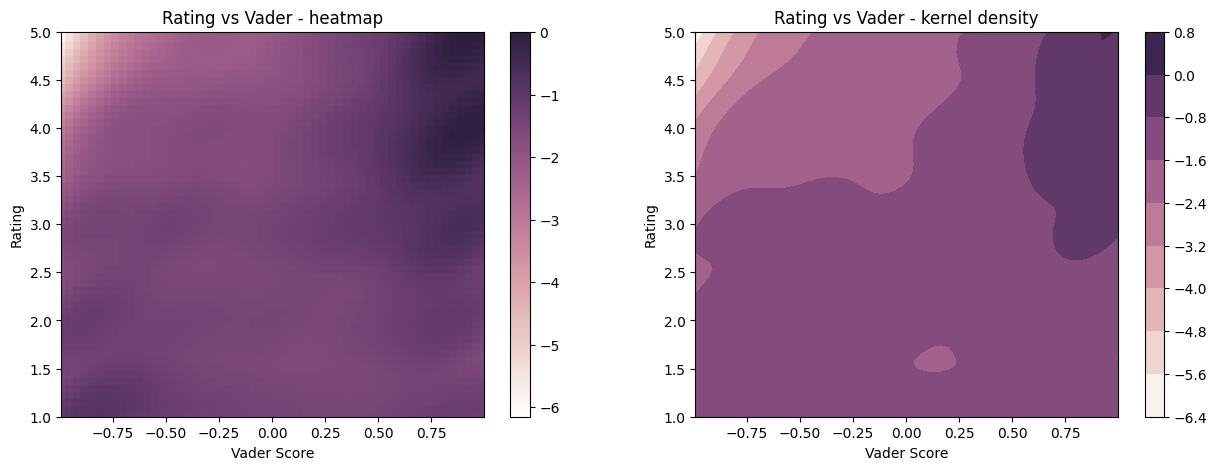

In [ ]:
##heatmap

k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density')

**ANSWER: The same trend could be discovered here, the top right has a darker color means  higher rating (around 3) usually has more data point on the vader score range**

### (ii) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score

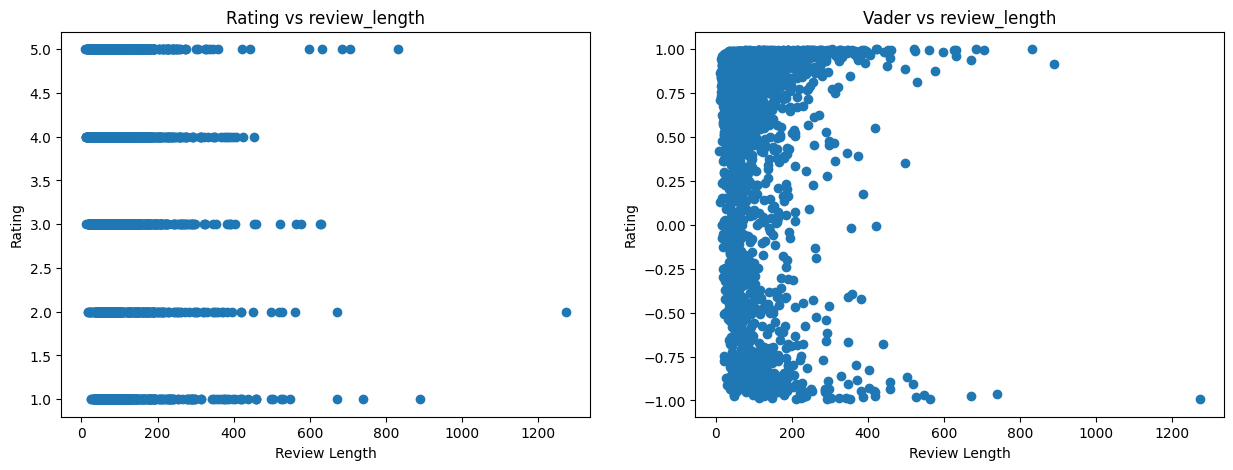

In [ ]:
review_extracted = finaldf["reviewCol"]
review_length = []
for review in review_extracted:
    review_length.append(len(review.split()))


fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(review_length, rating_scores,"o")
ax[1].plot(review_length, vader_scores,"o")

ax[0].set_title('Rating vs review_length')
ax[1].set_title('Vader vs review_length')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Review Length')


**From the result, we can say that there are no explicit relation between the length of the reviews and rating. However, with Vader VS review_length diagram, we can say that most longer reviews are distributed at extremely low and extremely high vader score.**

Text(0.5, 1.0, 'review_length vs vader')

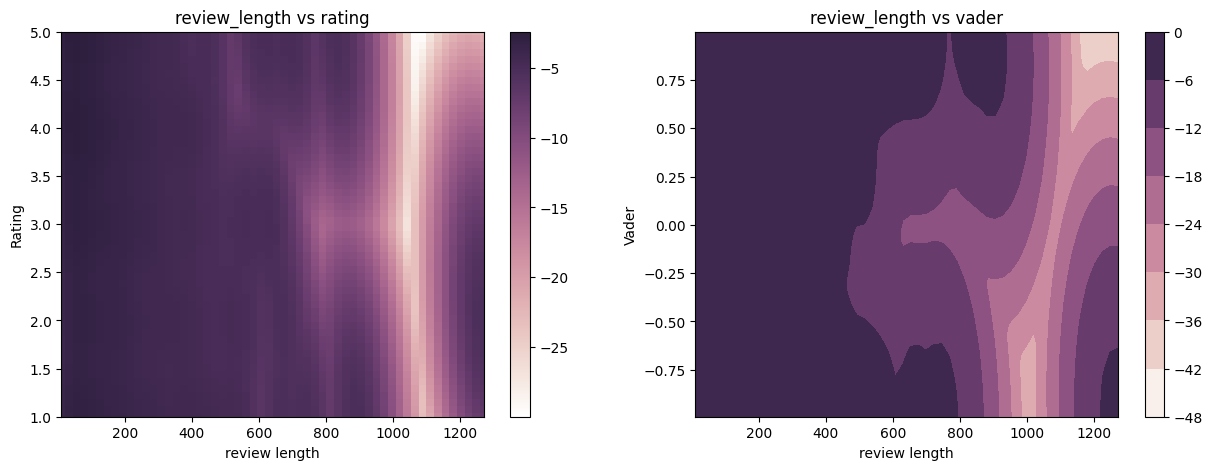

In [ ]:
review_length = np.array(review_length)

k = gaussian_kde(np.vstack([review_length, rating_scores]))
xi, yi = np.mgrid[review_length.min():review_length.max():review_length.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

k2 = gaussian_kde(np.vstack([review_length, vader_scores]))
xi2, yi2 = np.mgrid[review_length.min():review_length.max():review_length.size**0.5*1j,vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j]
zi2 = k2(np.vstack([xi2.flatten(), yi2.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi2, yi2, np.log10(zi2.reshape(xi2.shape)), cmap=cmap)

ax1.set_xlim(review_length.min(), review_length.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(review_length.min(), review_length.max())
ax2.set_ylim(vader_scores.min(), vader_scores.max())

ax1.set_xlabel('review length')
ax1.set_ylabel('Rating')

ax2.set_xlabel('review length')
ax2.set_ylabel('Vader')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('review_length vs rating')
ax2.set_title('review_length vs vader')


**ANSWER: From the heat map we can see that rating score and vader score have similar distribution.**

### (iii) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score

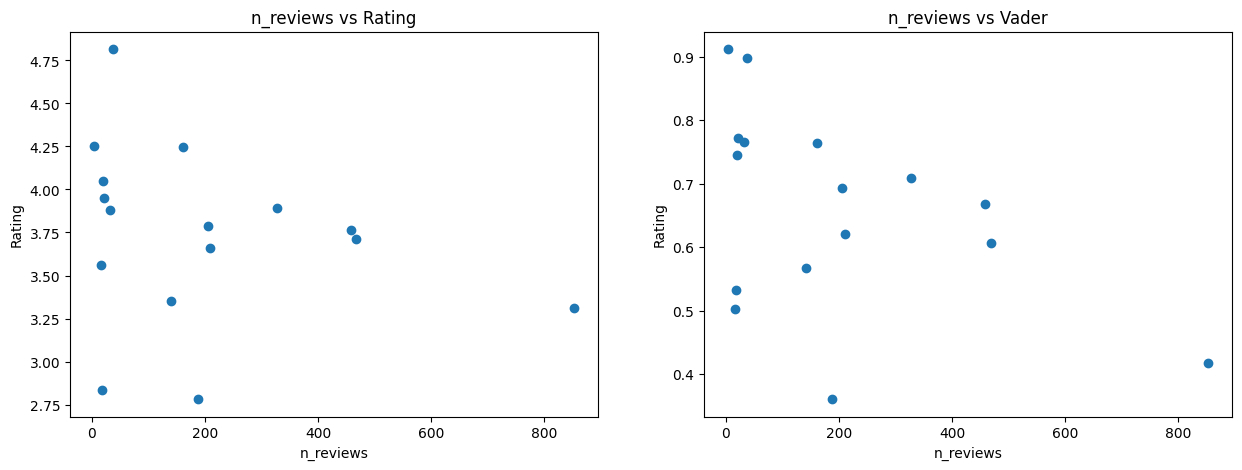

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
ave_vader_scores = avg_rating_df['AverageVaderRating'].values
ave_rating_scores = avg_rating_df['AverageGroundTruthRating'].values
n_reviews = avg_rating_df['n_reviews'].values
ax[0].plot(n_reviews, ave_rating_scores ,"o")
ax[1].plot(n_reviews, ave_vader_scores,"o")

ax[0].set_title('n_reviews vs Rating')
ax[1].set_title('n_reviews vs Vader')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('n_reviews')

**ANSWER:1. The rating and vader are strongly correlated. 2. with less reviews, hotel can easily have a higher rating and vader score.**

### (d) Location-based patterns

In [ ]:
def make_address(row):
  # individual columns need to be combined
  return row['streetAddress']+", "+row['City']+", "+row['Province']

In [ ]:
geo_rating_df = avg_rating_df\
                         .join(hotelDf.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)


In [ ]:
geo_rating_df["City"] = 'Oshawa'

In [ ]:
# 0 - need to give the tool a generic name.
locator = Photon(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df.head(16)



,AverageVaderRating,AverageGroundTruthRating,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
Best Western Plus Durham Hotel &amp; Conference Centre,0.606866,3.713675,468,559 Bloor St W,Oshawa,Ontario,L1J 5Y6,"559 Bloor St W, ('Oshawa',), Ontario","(559, Bloor Street West, L1J 5Y6, Bloor Street...","(43.8751157, -78.877595, 0.0)",43.875116,-78.877595,0.0
Comfort Inn,0.567330,3.354610,141,605 Bloor St W,Oshawa,Ontario,L1J 5Y6,"605 Bloor St W, ('Oshawa',), Ontario","(605, Bloor Street West, L1J 5Y6, Bloor Street...","(43.87510428683759, -78.87847771479021, 0.0)",43.875104,-78.878478,0.0
Courtyard by Marriott Oshawa,0.744620,4.050000,20,1011 Bloor Street East,Oshawa,Ontario,L1H 7K6,"1011 Bloor Street East, ('Oshawa',), Ontario","(Line 2 Bloor-Danforth, Bloor Street East, M4W...","(43.6735314, -79.3690403, 0.0)",43.673531,-79.369040,0.0
Durham College Simcoe Village Residence,0.532183,2.833333,18,1910 Simcoe St N,Oshawa,Ontario,L1G 4Y3,"1910 Simcoe St N, ('Oshawa',), Ontario","(Simcoe Village, 1910, Simcoe Street North, L1...","(43.9440969, -78.89182464560105, 0.0)",43.944097,-78.891825,0.0
Emerson Manor,0.912050,4.250000,4,132 Stevenson Rd N,Oshawa,Ontario,L1J 5M5,"132 Stevenson Rd N, ('Oshawa',), Ontario","(132, Stevenson Road North, L1J 7J1, Stevenson...","(43.89682201527778, -78.88481722083334, 0.0)",43.896822,-78.884817,0.0
"Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel",0.764408,4.246914,162,67 Simcoe St N,Oshawa,Ontario,L1G 4S3,"67 Simcoe St N, ('Oshawa',), Ontario","(67, 1011 Simcoe Street North, L1G 4W0, 1011 S...","(43.92455643079367, -78.87337562400035, 0.0)",43.924556,-78.873376,0.0
"Holiday Inn Express Whitby Oshawa, an IHG Hotel",0.693270,3.785366,205,180 Consumers Drive,Oshawa,Ontario,L1N 9S3,"180 Consumers Drive, ('',), Ontario","(180, Consumers Drive, L1N 4A6, Consumers Driv...","(43.8681618, -78.9336141, 0.0)",43.868162,-78.933614,0.0
La Quinta Inn &amp; Suites Oshawa,0.668460,3.762009,458,63 King St E,Oshawa,Ontario,L1H 1B4,"63 King St E, ('Oshawa',), Ontario","(63, King Street East, L1H 1A0, King Street Ea...","(43.89826615625, -78.86096840625, 0.0)",43.898266,-78.860968,0.0
Lucien Motel,0.771771,3.952381,21,134 Byron St N,Oshawa,Ontario,L1N 4M9,"134 Byron St N, ('',), Ontario","(134, Byron Street, N0M 2M0, Byron Street, Zor...","(43.0612998, -80.99970297692307, 0.0)",43.061300,-80.999703,0.0


In [ ]:
geo_rating_df['hotel_names'] = geo_rating_df.index.to_list()

geo_rating_df.head(16)

,AverageVaderRating,AverageGroundTruthRating,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude,hotel_names
hotelName,,,,,,,,,,,,,,
Best Western Plus Durham Hotel &amp; Conference Centre,0.606866,3.713675,468,559 Bloor St W,Oshawa,Ontario,L1J 5Y6,"559 Bloor St W, ('Oshawa',), Ontario","(559, Bloor Street West, L1J 5Y6, Bloor Street...","(43.8751157, -78.877595, 0.0)",43.875116,-78.877595,0.0,Best Western Plus Durham Hotel &amp; Conferenc...
Comfort Inn,0.567330,3.354610,141,605 Bloor St W,Oshawa,Ontario,L1J 5Y6,"605 Bloor St W, ('Oshawa',), Ontario","(605, Bloor Street West, L1J 5Y6, Bloor Street...","(43.87510428683759, -78.87847771479021, 0.0)",43.875104,-78.878478,0.0,Comfort Inn
Courtyard by Marriott Oshawa,0.744620,4.050000,20,1011 Bloor Street East,Oshawa,Ontario,L1H 7K6,"1011 Bloor Street East, ('Oshawa',), Ontario","(Line 2 Bloor-Danforth, Bloor Street East, M4W...","(43.6735314, -79.3690403, 0.0)",43.673531,-79.369040,0.0,Courtyard by Marriott Oshawa
Durham College Simcoe Village Residence,0.532183,2.833333,18,1910 Simcoe St N,Oshawa,Ontario,L1G 4Y3,"1910 Simcoe St N, ('Oshawa',), Ontario","(Simcoe Village, 1910, Simcoe Street North, L1...","(43.9440969, -78.89182464560105, 0.0)",43.944097,-78.891825,0.0,Durham College Simcoe Village Residence
Emerson Manor,0.912050,4.250000,4,132 Stevenson Rd N,Oshawa,Ontario,L1J 5M5,"132 Stevenson Rd N, ('Oshawa',), Ontario","(132, Stevenson Road North, L1J 7J1, Stevenson...","(43.89682201527778, -78.88481722083334, 0.0)",43.896822,-78.884817,0.0,Emerson Manor
"Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel",0.764408,4.246914,162,67 Simcoe St N,Oshawa,Ontario,L1G 4S3,"67 Simcoe St N, ('Oshawa',), Ontario","(67, 1011 Simcoe Street North, L1G 4W0, 1011 S...","(43.92455643079367, -78.87337562400035, 0.0)",43.924556,-78.873376,0.0,Holiday Inn Express &amp; Suites Oshawa Downto...
"Holiday Inn Express Whitby Oshawa, an IHG Hotel",0.693270,3.785366,205,180 Consumers Drive,Oshawa,Ontario,L1N 9S3,"180 Consumers Drive, ('',), Ontario","(180, Consumers Drive, L1N 4A6, Consumers Driv...","(43.8681618, -78.9336141, 0.0)",43.868162,-78.933614,0.0,"Holiday Inn Express Whitby Oshawa, an IHG Hotel"
La Quinta Inn &amp; Suites Oshawa,0.668460,3.762009,458,63 King St E,Oshawa,Ontario,L1H 1B4,"63 King St E, ('Oshawa',), Ontario","(63, King Street East, L1H 1A0, King Street Ea...","(43.89826615625, -78.86096840625, 0.0)",43.898266,-78.860968,0.0,La Quinta Inn &amp; Suites Oshawa
Lucien Motel,0.771771,3.952381,21,134 Byron St N,Oshawa,Ontario,L1N 4M9,"134 Byron St N, ('',), Ontario","(134, Byron Street, N0M 2M0, Byron Street, Zor...","(43.0612998, -80.99970297692307, 0.0)",43.061300,-80.999703,0.0,Lucien Motel


In [ ]:
geo_rating_df.loc['Courtyard by Marriott Oshawa', 'latitude'] = 43.88894
geo_rating_df.loc['Courtyard by Marriott Oshawa', 'longitude'] = -78.81931


geo_rating_df.loc['Lucien Motel', 'latitude'] = 43.88117
geo_rating_df.loc['Lucien Motel', 'longitude'] = -78.94447


geo_rating_df.loc['TownePlace Suites Oshawa', 'latitude'] = 43.88876
geo_rating_df.loc['TownePlace Suites Oshawa', 'longitude'] = -78.81897

In [ ]:
map1 = folium.Map(
    location=[43.897095,-78.865791], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)

geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]],color='#d7191c',popup=f"<b>{row['AverageGroundTruthRating']}</b>", tooltip=f"<b>{row['hotel_names']}</b>").add_to(map1), axis=1)

map1.save("hotel_location.html")

map1

**BY LOOKING THE MAP WE CAN SEE THAT THE HIGH RATED HOTEL ARE ALL LOCATED IN THE DOWNTOWN AREA**

## (e) Temporal analysis

### (i) Plot the rolling average score as a function of time

In [ ]:
avg_rating_df.sort_values(by = ['AverageGroundTruthRating'],ascending=False)

,AverageVaderRating,AverageGroundTruthRating,n_reviews
hotelName,,,
Paddington Place Bed &amp; Breakfast,0.897747,4.815789,38
Emerson Manor,0.912050,4.250000,4
"Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel",0.764408,4.246914,162
Courtyard by Marriott Oshawa,0.744620,4.050000,20
Lucien Motel,0.771771,3.952381,21
Residence Inn by Marriott Whitby,0.708352,3.893293,328
Residence &amp; Conference Centre - Oshawa,0.765588,3.878788,33
"Holiday Inn Express Whitby Oshawa, an IHG Hotel",0.693270,3.785366,205
La Quinta Inn &amp; Suites Oshawa,0.668460,3.762009,458


In [ ]:
six_hotel = ['Paddington Place Bed &amp; Breakfast','Holiday Inn Express &amp; Suites Oshawa Downtown - Toronto Area, an IHG Hotel','Residence Inn by Marriott Whitby','Holiday Inn Express Whitby Oshawa, an IHG Hotel','Travelodge Oshawa Whitby','Motel 6 Toronto East - Whitby']


print(len(six_hotel))

6


In [ ]:
hotelDf

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,oshawa\ca\155003\1478553\133252910.html,Residence &amp; Conference Centre - Oshawa,"""This is a university dorm, but with upgrades ...",3,negative,"July 2, 2012",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
1,oshawa\ca\155003\1478553\133870778.html,Residence &amp; Conference Centre - Oshawa,"""Traveled to the area for a Lacrosse tournamen...",4,positive,"July 9, 2012",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
2,oshawa\ca\155003\1478553\162774619.html,Residence &amp; Conference Centre - Oshawa,"""Attending a conference. This university dorm...",4,positive,"June 2, 2013",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
3,oshawa\ca\155003\1478553\162907866.html,Residence &amp; Conference Centre - Oshawa,"""We attended a conference at Durham College an...",5,positive,"June 3, 2013",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
4,oshawa\ca\155003\1478553\205856974.html,Residence &amp; Conference Centre - Oshawa,"""Been meaning to post this for a while. I stay...",3,negative,"May 16, 2014",32 Commencement Dr,"('Oshawa',)",Ontario,L1G 8G3
...,...,...,...,...,...,...,...,...,...,...
3158,oshawa\ca\181734\502094\870059339.html,Residence Inn by Marriott Whitby,"""Room has a smell that won\u2019t go away and ...",1,negative,"November 28, 2022",160 Consumers Dr,"('',)",Ontario,L1N 9S3
3159,oshawa\ca\181734\502094\873079022.html,Residence Inn by Marriott Whitby,"""I am apalled at the lack of proper customer s...",1,negative,"December 28, 2022",160 Consumers Dr,"('',)",Ontario,L1N 9S3
3160,oshawa\ca\181734\502094\875942867.html,Residence Inn by Marriott Whitby,"""the bed is so so, the fan in the room made a ...",2,negative,"January 22, 2023",160 Consumers Dr,"('',)",Ontario,L1N 9S3
3161,oshawa\ca\181734\502094\879218614.html,Residence Inn by Marriott Whitby,"""Knowing that there was a hockey tournament, ...",1,negative,3 weeks ago,160 Consumers Dr,"('',)",Ontario,L1N 9S3


In [ ]:
hotelDf.drop(hotelDf[hotelDf.date_stamp == '4 weeks ago'].index, inplace=True)
hotelDf.drop(hotelDf[hotelDf.date_stamp == '2 weeks ago'].index, inplace=True)
hotelDf.drop(hotelDf[hotelDf.date_stamp == '3 weeks ago'].index, inplace=True)

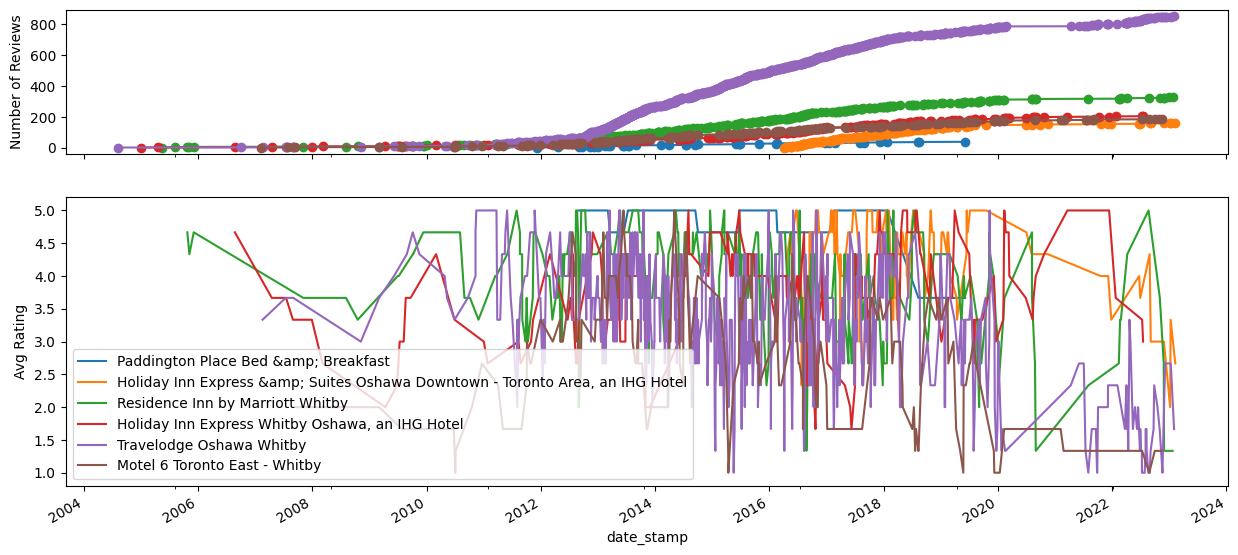

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotel: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

**SINCE THE GRAPH IS TOO NOISY WE CAN CONCLUDE THAT BOTH HIGH RATING AND LOW RATING HOTEL ARE FLUCATED**

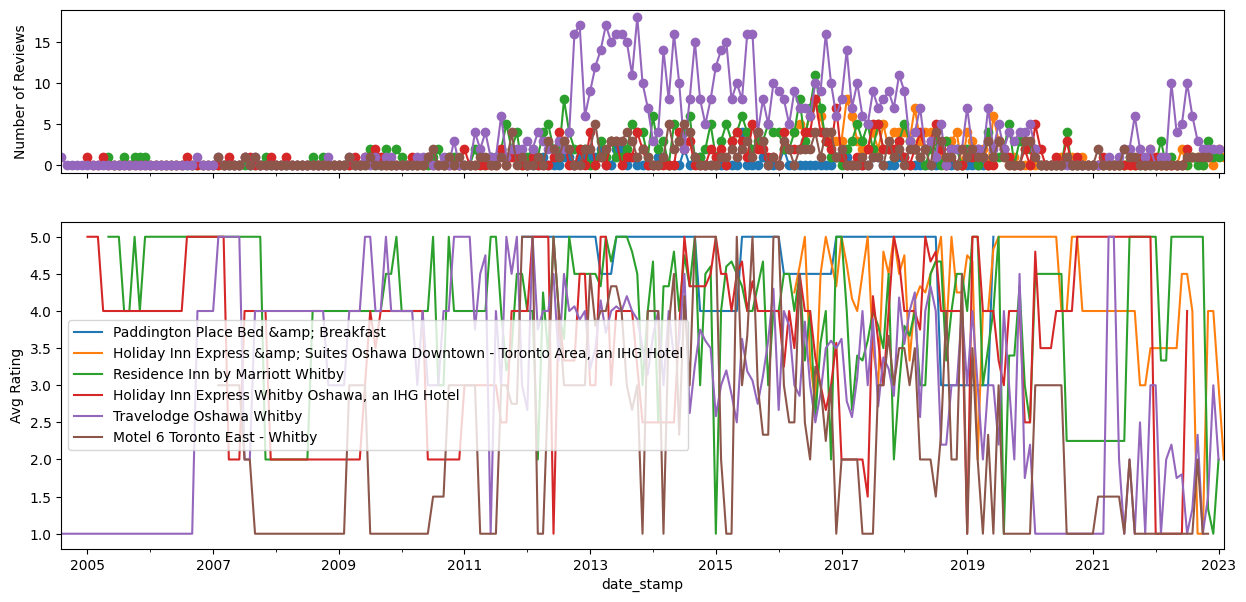

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotel: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

**SINCE 2011 UP TO 2019, THE REVIEW NUMBERS ARE FLUCATED, THIS COULD BECAUSE PEOPLE ARE MORE FAMILIAR WITH BOOKING HOTELS ONLINE AND WRITING COMMENTS WHEN THEY LEAVE, THE DROP IN NUMBER OF REVIEWS HAPPENED AFTER 2011, THIS COULD BECAUSE THE OUTBREAK OF THE PANDEMIC**